In [10]:
# Dependencies and Setup
# !pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [12]:
# 

# We eventually want to plug in multiple city names
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# Creat City list
city_info = []

# Loop to parse through to fill dicitionary with pulled data 
for city in cities:
    request = requests.get(base_url + city)
    response = request.json()
    try:
        city_dict = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lon": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }

        city_info.append(city_dict)
# Run code regardless if city doesn't fit in df      
    except:
        print(f"{city} will not print")








illoqqortoormiut will not print
nizhneyansk will not print
mouzakion will not print
amderma will not print
belushya guba will not print
tsihombe will not print
ngukurr will not print
tabiauea will not print
ozgon will not print
taolanaro will not print
longlac will not print
sentyabrskiy will not print
grand river south east will not print
zarakes will not print
doctor pedro p. pena will not print
aflu will not print
lugovskiy will not print
attawapiskat will not print
samusu will not print
barentsburg will not print
rolim de moura will not print
mys shmidta will not print
lolua will not print
vaitupu will not print
kyle of lochalsh will not print
tumannyy will not print
umzimvubu will not print
mrirt will not print
samalaeulu will not print
meyungs will not print
saleaula will not print
old road will not print
rungata will not print
bolshegrivskoye will not print
maloshuyka will not print
fevralsk will not print
brahmapuri will not print
kachikau will not print
palabuhanratu will not 

In [13]:
weather_df= pd.DataFrame(city_info)

weather_df.  

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Galesong,-5.3166,119.3661,77.02,80,71,3.69,ID,1636498341
1,Teno,-34.8667,-71.1833,74.75,43,0,10.36,CL,1636498342
2,Castro,-24.7911,-50.0119,62.13,94,3,9.35,BR,1636498342
3,Igrim,63.1906,64.4162,21.38,74,100,12.91,RU,1636498343
4,Busselton,-33.6500,115.3333,53.04,65,0,8.25,AU,1636498343
...,...,...,...,...,...,...,...,...,...
549,Egvekinot,66.3167,-179.1667,10.69,85,51,6.29,RU,1636498702
550,Ulaanbaatar,47.9077,106.8832,5.13,85,0,4.47,MN,1636498702
551,Yokadouma,3.5167,15.0500,71.44,90,93,0.67,CM,1636498703
552,Santa Marta,11.2408,-74.1990,86.34,82,55,12.55,CO,1636498561


In [347]:
# export DataFrame to a csv
weather_df.to_csv("../Output_data/WeatherPy.csv", encoding="utf-8", index= False)


In [330]:
# Summary df

# Drop columns without numerical values
new_weather = weather_df.drop(columns=['City', 'Country'])

# Calculations
count = round(new_weather.count(), 2)
mean = round(new_weather.mean(), 2)
std = round(new_weather.std(), 2)
minimum = round(new_weather.min(), 2)
low_q = round(new_weather.quantile(.25), 2)
mid_q = round(new_weather.quantile(.50), 2)
upper_q = round(new_weather.quantile(.75), 2)
maximum = round(new_weather.max(), 2)

# Create Summary df
summary_df = pd.DataFrame()
summary_df["Count"] = count
summary_df["Mean"] = mean
summary_df["STD"] = std
summary_df["Min"] = minimum
summary_df["25%"] = low_q
summary_df["50%"] = mid_q
summary_df["75%"] = upper_q
summary_df["Max"] = maximum

# Transpose Index and Columns
final_summary_df = summary_df.transpose()

# Display
final_summary_df


,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Count,554.00,554.00,554.00,554.00,554.00,554.00,5.540000e+02
Mean,21.10,19.61,56.70,73.61,57.59,7.66,1.636499e+09
STD,32.81,89.73,24.30,19.67,38.64,5.45,1.125500e+02
Min,-54.80,-179.17,-22.04,5.00,0.00,0.00,1.636498e+09
25%,-5.30,-59.47,37.83,65.25,18.00,3.74,1.636498e+09
50%,25.17,23.59,65.20,78.00,74.00,6.41,1.636499e+09
75%,48.49,99.63,76.40,87.00,96.00,10.46,1.636499e+09
Max,78.22,179.32,91.38,100.00,100.00,44.47,1.636499e+09


In [195]:
# Clean Data Check

humidity = weather_df.loc[weather_df['Humidity'] > 100]

# Display
humidity

# There are no cities with Humidity > 100%

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


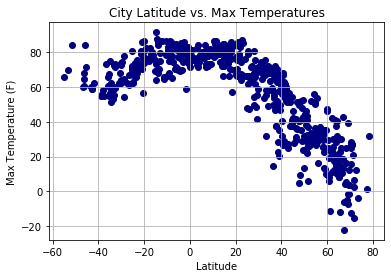

In [336]:
# Latitude vs. Temperature Plot

# Scatterplot formatting
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='navy', )
plt.grid(True)
plt.title("City Latitude vs. Max Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save image
plt.savefig("../Output_data/Latitude_vs_Temperature_Plot.png")

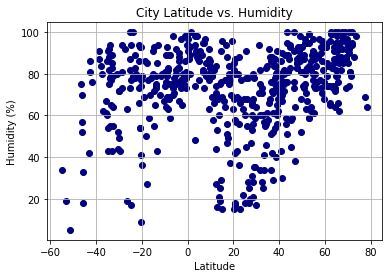

In [337]:
# Latitude vs. Humidity Plot

# Scatterplot formatting
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color='navy', )
plt.grid(True)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save image
plt.savefig("../Output_data/lat_vs_humidity.png")

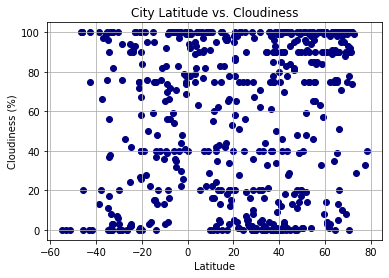

In [338]:
# Latitude vs. Cloudiness 

# Scatterplot formatting
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='navy', )
plt.grid(True)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image
plt.savefig("../Output_data/lat_vs_cloud.png")

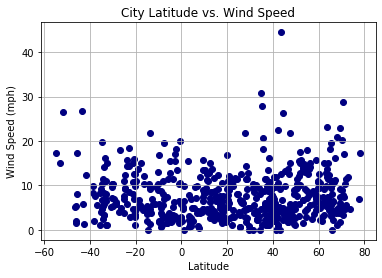

In [339]:
# Latitude vs. Wind Speed Plot

# Scatterplot formatting
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color='navy', )
plt.grid(True)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Image
plt.savefig("../Output_data/lat_vs_wind.png")

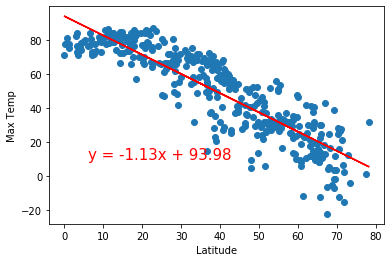

The r-value is: 0.7845696890347135


<Figure size 432x288 with 0 Axes>

In [340]:
#Northern Hemisphere- Max Temp vs. Latitude Linear Regression

# Cities with Northern hemisphere latitude values
northern_lat_df = weather_df.loc[weather_df["Lat"] > 0]

# X and Y values
northern_lat_values = northern_lat_df["Lat"]                                    
max_temp = northern_lat_df["Max Temp"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_values, max_temp)
regress_values = northern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(northern_lat_values, max_temp)
plt.plot(northern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/North_max_temp_vs_lat.png")




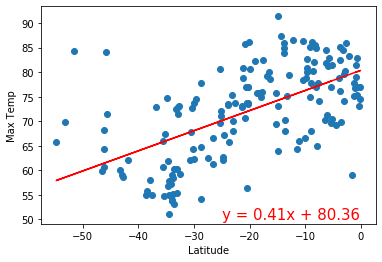

The r-value is: 0.3474269854195372


<Figure size 432x288 with 0 Axes>

In [341]:
# Southern Hemisphere- Max Temp vs. Latitude Linear Regression 

# Cities with Sounther Hemisphere latitude values 
southern_lat_df = weather_df.loc[weather_df["Lat"] < 0]

# X and Y values
southern_lat_values = southern_lat_df["Lat"]
south_max_temp = southern_lat_df["Max Temp"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_values, south_max_temp)
regress_values = southern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(southern_lat_values, south_max_temp)
plt.plot(southern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/South_max_temp_vs_lat.png")


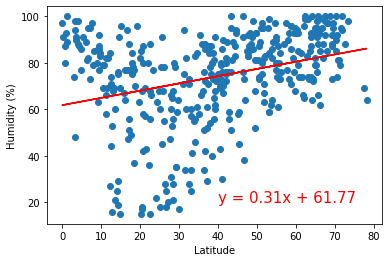

The r-value is: 0.09759568714915856


<Figure size 432x288 with 0 Axes>

In [335]:
# Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression

# X and Y values 
northern_lat_values = northern_lat_df["Lat"]                                    
north_humidity = northern_lat_df["Humidity"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_values, north_humidity)
regress_values = northern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(northern_lat_values, north_humidity)
plt.plot(northern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/North_humidity_vs_lat.png")


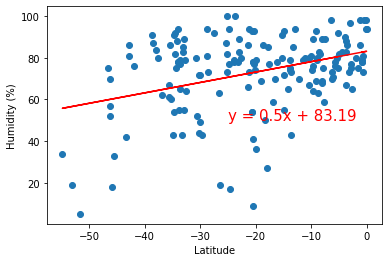

The r-value is: 0.13304787702596715


<Figure size 432x288 with 0 Axes>

In [342]:
# Sourthern Hemisphere- Humidity (%) vs. Latitude Linear Regression

# X and Y values
southern_lat_values = southern_lat_df["Lat"]
south_humidity = southern_lat_df["Humidity"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_values, south_humidity)
regress_values = southern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(southern_lat_values, south_humidity)
plt.plot(southern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/South_humidity_vs_lat.png")




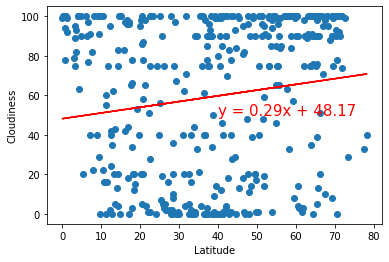

The r-value is: 0.022514700775255317


<Figure size 432x288 with 0 Axes>

In [343]:
# Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

# X and Y values 
northern_lat_values = northern_lat_df["Lat"]                                    
north_cloudiness = northern_lat_df["Cloudiness"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_values, north_cloudiness)
regress_values = northern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(northern_lat_values, north_cloudiness)
plt.plot(northern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/North_cloudiness_vs_lat.png")




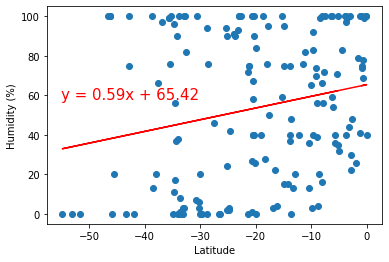

The r-value is: 0.045157283992433545


<Figure size 432x288 with 0 Axes>

In [344]:
# Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression

# X and Y values
southern_lat_values = southern_lat_df["Lat"]
south_cloudiness = southern_lat_df["Cloudiness"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_values, south_cloudiness)
regress_values = southern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(southern_lat_values, south_cloudiness)
plt.plot(southern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(-55,58),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/South_cloudiness_vs_lat.png")



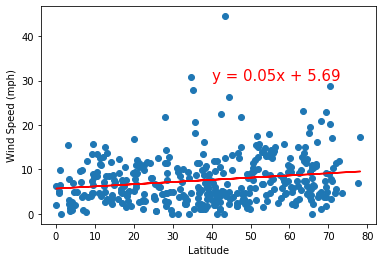

The r-value is: 0.03288844035962367


<Figure size 432x288 with 0 Axes>

In [345]:
# Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression

# X and Y values 
northern_lat_values = northern_lat_df["Lat"]                                    
north_wind_speed = northern_lat_df["Wind Speed"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat_values, north_wind_speed)
regress_values = northern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(northern_lat_values, north_wind_speed)
plt.plot(northern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/North_wind_speed_vs_lat.png")

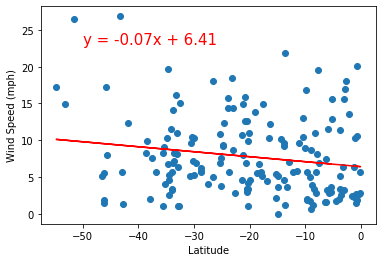

The r-value is: 0.029103637264356146


<Figure size 432x288 with 0 Axes>

In [346]:
# Southern Hemispher- Wind Speed (mph) vs. Latitude Linear Regression

# X and Y values
southern_lat_values = southern_lat_df["Lat"]
south_wind_speed = southern_lat_df["Wind Speed"]

# Linear Regression calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat_values, south_wind_speed)
regress_values = southern_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatterplot
plt.scatter(southern_lat_values, south_wind_speed)
plt.plot(southern_lat_values,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# R-value
print(f"The r-value is: {rvalue**2}")

# Save Image
plt.savefig("../Output_data/South_wind_speed_vs_lat.png")
